## Comparing Various Syntax Methods

1. Token Based Edit Distance
2. POS Edit Distance
3. Dep Parse Edit Distance
4. Tree Edit Distance

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import exp_libs.syntax as syntax
import libs.preprocessing as pp
import libs.stats as stats
import libs.utils as utils
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
%matplotlib inline

In [2]:
df_en = pd.read_csv('../../../datasets/final/en/asag_v2_en_filter.csv', sep='~', index_col=False)
nlp_en = spacy.load('en')
df_en.head(1)

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

In [4]:
reload(syntax)
feature_map = {
    'token_based_ED' : syntax.create_feature_token_edit_distance(stopwords=pp.EN_STOPS),
    'POS_ED' : syntax.create_feature_pos_edit_distance(),
    'DP_ED' : syntax.create_feature_dp_edit_distance(),
    'Tree_ED' : syntax.feature_tree_edit_distance,
    'Bleu_Score' : syntax.create_feature_bleu_score(smoothing_function=syntax.SF.method1, stopwords=pp.EN_STOPS)
}

results = syntax.execute_model(df_en, nlp_en, feature_map)

[100] completed
[200] completed
[300] completed
[400] completed
[500] completed
[600] completed
[700] completed
[800] completed
[900] completed
[1000] completed
[1100] completed
[1200] completed
[1300] completed
[1400] completed
[1500] completed
[1600] completed
[1700] completed
[1800] completed
[1900] completed
[2000] completed


In [30]:
tree_ed = syntax.feature_tree_edit_distance

In [36]:
tree_ed(nlp_en('the dog bit the cat'), nlp_en('the dog bit the cat'), {})

0.0

In [5]:
results['Score'] = df_en['Score'].copy()
results['MyScore'] = df_en['MyScore'].copy()
display(results.head(2))
results.to_csv("../tmp/syntax_no_normalization.csv", sep='~')

token_based_ED  POS_ED  DP_ED  Tree_ED  Bleu_Score  Score  MyScore
0              18      22     27     88.0    0.011498    3.5        4
1              16      27     28     68.0    0.047424    5.0        5

In [6]:
reload(utils)
results2 = results.copy()
results2['token_based_ED'] = utils.min_max_normalization(results2['token_based_ED'])
results2['POS_ED'] = utils.min_max_normalization(results2['POS_ED'])
results2['DP_ED'] = utils.min_max_normalization(results2['DP_ED'])
results2['Tree_ED'] = utils.min_max_normalization(results2['Tree_ED'])
results2.head(2)
results2.to_csv("../tmp/syntax_with_normalization.csv", sep='~')

In [7]:
results2['ID'] = df_en['ID']
display(results2.corr())

token_based_ED    POS_ED     DP_ED   Tree_ED  Bleu_Score  \
token_based_ED        1.000000  0.929691  0.935307  0.544744   -0.336266   
POS_ED                0.929691  1.000000  0.981961  0.448858   -0.297712   
DP_ED                 0.935307  0.981961  1.000000  0.490548   -0.279993   
Tree_ED               0.544744  0.448858  0.490548  1.000000   -0.306636   
Bleu_Score           -0.336266 -0.297712 -0.279993 -0.306636    1.000000   
Score                -0.083261 -0.047280 -0.041436 -0.074429    0.247237   
MyScore              -0.075412 -0.038573 -0.031212 -0.066355    0.193179   
ID                   -0.029074 -0.019739 -0.024904  0.111426    0.068976   

                   Score   MyScore        ID  
token_based_ED -0.083261 -0.075412 -0.029074  
POS_ED         -0.047280 -0.038573 -0.019739  
DP_ED          -0.041436 -0.031212 -0.024904  
Tree_ED        -0.074429 -0.066355  0.111426  
Bleu_Score      0.247237  0.193179  0.068976  
Score           1.000000  0.713148  0.062304  
MyScore         0.713148  1.000000 -0.109315  
ID              0.062304 -0.109315  1.000000

In [8]:
results.describe()

token_based_ED       POS_ED        DP_ED      Tree_ED   Bleu_Score  \
count     2010.000000  2010.000000  2010.000000  2010.000000  2010.000000   
mean        11.160697    13.809950    16.136816    82.153234     0.093112   
std          7.047697    10.597656    11.454704    40.110504     0.139731   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25%          7.000000     8.000000     9.000000    53.000000     0.019513   
50%         10.000000    12.000000    15.000000    77.000000     0.045883   
75%         14.000000    17.000000    20.000000   110.000000     0.104395   
max         86.000000   139.000000   150.000000   268.000000     1.000000   

             Score      MyScore  
count  2010.000000  2010.000000  
mean      4.150187     3.578109  
std       1.066063     1.730504  
min       0.000000     0.000000  
25%       3.500000     3.000000  
50%       4.500000     4.000000  
75%       5.000000     5.000000  
max       5.000000     5.000000

In [120]:
# Correct Scores
results[df_en['Class2_Score'] > 0].describe()

token_based_ED       POS_ED        DP_ED      Tree_ED   Bleu_Score  \
count     1533.000000  1533.000000  1533.000000  1533.000000  1533.000000   
mean        10.884540    13.559035    15.903457    81.195695     0.103968   
std          6.569898     9.963376    10.657427    40.183711     0.141761   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25%          6.000000     7.000000     9.000000    52.000000     0.025443   
50%         10.000000    12.000000    15.000000    76.000000     0.056570   
75%         14.000000    17.000000    20.000000   110.000000     0.122468   
max         66.000000   133.000000   142.000000   268.000000     1.000000   

             Score      MyScore  
count  1533.000000  1533.000000  
mean      4.517449     4.428571  
std       0.727063     0.789714  
min       1.500000     3.000000  
25%       4.000000     4.000000  
50%       5.000000     5.000000  
75%       5.000000     5.000000  
max       5.000000     5.000000

In [218]:
# Incorrect Scores
display(results2.groupby(['ID']).corr()[cols].index[12.3])

MultiIndex(levels=[[1.1, 1.2, 1.3, 1.5, 1.6, 1.7, 2.1, 2.2, 2.3, 2.4, 2.6, 2.7, 3.1, 3.3, 3.4, 3.5, 3.6, 3.7, 4.1, 4.2, 4.4, 4.5, 5.1, 5.2, 5.3, 5.4, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 7.1, 7.2, 7.3, 7.5, 7.6, 7.7, 8.1, 8.3, 8.4, 8.5, 8.6, 8.7, 9.1, 9.3, 9.4, 9.5, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 11.1, 11.4, 11.5, 11.7, 11.8, 11.9, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.8, 12.9], ['Bleu_Score', 'DP_ED', 'MyScore', 'POS_ED', 'Score', 'Tree_ED', 'token_based_ED']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 2

In [16]:
## What about questions where order really matters?
idxs = df_en['ID'] == 12.3
display(df_en[idxs].head())
cols = ['token_based_ED','POS_ED','DP_ED','Tree_ED', 'Score']

from pandas.plotting import scatter_matrix

# scatter_matrix(results2.groupby(['ID']).corr()[cols], figsize=(14,10), alpha=0.3, diagonal='kde', color='k', hist_kwds={'color' : 'k'})
#break

idxs = df_en['Class3_Score'] >= 2

t2 = results2.groupby(['ID']).corr()[['Bleu_Score', 'Score']]

def plot_corr(x,y,title, labels=[], savefile=['','']):

    plt.title('Distribution of {}'.format(labels[0]))
    plt.hist(x, color='k', bins=30)
    plt.xlabel(labels[0])
    if len(savefile) > 0 and len(savefile[0]) > 0:
        plt.savefig('../renderings/{}_hist.png'.format(savefile[0]))
        
    plt.show()
    
    corr = np.corrcoef(x,y)[1,0]
    
    plt.title('{} v. {}'.format(labels[0], labels[1]))
    plt.scatter(x, y, alpha=0.3, color='k')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend('bottom left', labels=['R={:.3f}'.format(corr)])
    if len(savefile) and len(savefile[1]) > 0:
        plt.savefig('../renderings/{}_scatter.png'.format(savefile[1]))
    plt.show()

# plot_corr(results[idxs]['Bleu_Score'], results[idxs]['Score'], labels=['Bleu Score', 'Score'],title='Bleu Score v. Score', savefile=['bleu_score_good', 'bleu_score_good'])
#plot_corr(results['Tree_ED'], results['Score'], labels=['Tree Edit Distance', 'Score'],title='Tree Edit Distance v. Score', savefile=['',''])
results2[idxs][['token_based_ED', 'Tree_ED', 'Score']].corr()

ID  AID  QID                                             Prompt  \
1814  12.3   12    3   Order the following functions by their runnin...   
1815  12.3   12    3   Order the following functions by their runnin...   
1816  12.3   12    3   Order the following functions by their runnin...   
1817  12.3   12    3   Order the following functions by their runnin...   
1818  12.3   12    3   Order the following functions by their runnin...   

                                                     MA  \
1814   log -LRB- log n -RRB- ; 2 to the power of -LR...   
1815   log -LRB- log n -RRB- ; 2 to the power of -LR...   
1816   log -LRB- log n -RRB- ; 2 to the power of -LR...   
1817   log -LRB- log n -RRB- ; 2 to the power of -LR...   
1818   log -LRB- log n -RRB- ; 2 to the power of -LR...   

                                                    MA2  \
1814  From largest to smallest: n!, n to the power o...   
1815  From largest to smallest: n!, n to the power o...   
1816  From largest to smallest: n!, n to the power o...   
1817  From largest to smallest: n!, n to the power o...   
1818  From largest to smallest: n!, n to the power o...   

                                                    MA3  \
1814   from lowest to highest  1-long -LRB- long n -...   
1815   from lowest to highest  1-long -LRB- long n -...   
1816   from lowest to highest  1-long -LRB- long n -...   
1817   from lowest to highest  1-long -LRB- long n -...   
1818   from lowest to highest  1-long -LRB- long n -...   

                                                     NA  \
1814   2 to the power of -LRB- log n -RRB- , n to th...   
1815   2 to the power of -LRB- log n -RRB- , n to th...   
1816   2 to the power of -LRB- log n -RRB- , n to th...   
1817   2 to the power of -LRB- log n -RRB- , n to th...   
1818   2 to the power of -LRB- log n -RRB- , n to th...   

                                                     SA  MyScore  \
1814   log -LRB- log n -RRB- , 2 to the power of -LR...        5   
1815   log -LRB- log n -RRB- , n to the power of 2, ...        0   
1816   log -LRB- logn -RRB- 2 to the power of -LRB- ...        5   
1817   log -LRB- log n -RRB- , 2 to the power of -LR...        5   
1818   log -LRB- log n -RRB- , 2 to the power of -LR...        5   

              Feedback  Feedback_Notes  Score  Class3_Score  Class2_Score  
1814  correct_complete             NaN    5.0             2             1  
1815     wrong_related  missed_concept    4.0             0             0  
1816  correct_complete             NaN    5.0             2             1  
1817  correct_complete             NaN    5.0             2             1  
1818  correct_complete             NaN    5.0             2             1

token_based_ED   Tree_ED     Score
token_based_ED        1.000000  0.628467 -0.115605
Tree_ED               0.628467  1.000000 -0.082901
Score                -0.115605 -0.082901  1.000000

5
IDX: 1814
MA: [ log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n to the power of 2; n to the power of 3; n! ]
SA: [ log -LRB- log n -RRB- , 2 to the power of -LRB- log n -RRB- , n to the power of 2, n to the power of 3, n! ]
TK: [0.0]
TR: [0.22014925373134328]
SCORE: [5.0]
====
IDX: 1815
MA: [ log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n to the power of 2; n to the power of 3; n! ]
SA: [ log -LRB- log n -RRB- , n to the power of 2, n to the power of 3, 2 to the power of -LRB- log n -RRB- , n! ]
TK: [0.08139534883720931]
TR: [0.21641791044776118]
SCORE: [4.0]
====
IDX: 1816
MA: [ log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n to the power of 2; n to the power of 3; n! ]
SA: [ log -LRB- logn -RRB- 2 to the power of -LRB- log n -RRB- n to the power of 2 n to the power of 3 n! ]
TK: [0.023255813953488372]
TR: [0.06343283582089553]
SCORE: [5.0]
====
IDX: 1817
MA: [ log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n to the pow

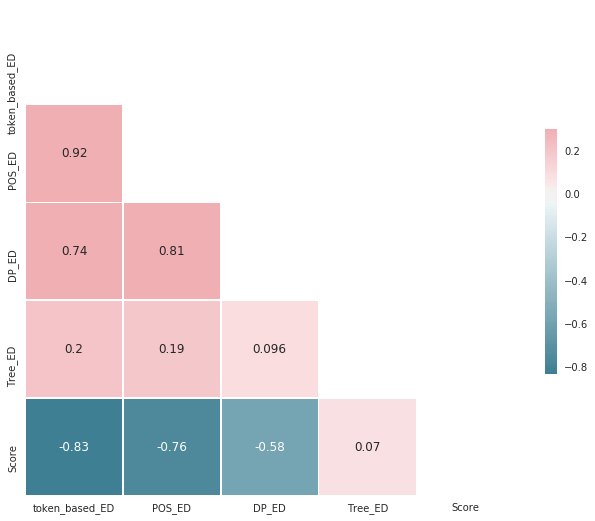

In [52]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
kols = ['token_based_ED','POS_ED','DP_ED','Tree_ED', 'Score']
base_idxs = df_en['ID'] == 12.3
idxs2 = np.logical_and(base_idxs, ~df_en.index.isin([1822, 1826, 1834, 1837,1840]))
corr = results2[idxs2][kols].corr()
k1 = results2[base_idxs][['Tree_ED','token_based_ED']]
print(len(corr))

for index, row in k1.iterrows():
    #continue
    value = df_en.iloc[index]
    print('IDX: {}'.format(index))
    print('MA: [{}]'.format(value['MA']))
    print('SA: [{}]'.format(value['SA']))
    print('TK: [{}]'.format(row['token_based_ED']))
    print('TR: [{}]'.format(row['Tree_ED']))
    print('SCORE: [{}]'.format(value['Score']))
    print('====')
    

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig('../renderings/edit_distance_correlations_12.3.png')

In [244]:
for index, row in results2[df_en['ID'] == 12.3].iterrows():
    raw = df_en.iloc[index]
    print('Prompt:', raw['Prompt'])
    print('Model Answer:', raw['MA'])
    print('Student Response:', raw['SA'])
    print('Score:', raw['Score'])
    print('MyScore:', raw['MyScore'])
    print('Token_Based_ED:', row['token_based_ED'])
    print('Tree ED:', row['Tree_ED'])
    print('----')

Prompt:  Order the following functions by their running time: n to the power of 2; log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n!; n to the power of 3. 
Model Answer:  log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n to the power of 2; n to the power of 3; n! 
Student Response:  log -LRB- log n -RRB- , 2 to the power of -LRB- log n -RRB- , n to the power of 2, n to the power of 3, n! 
Score: 5.0
MyScore: 5
Token_Based_ED: 0.0
Tree ED: 0.22014925373134328
----
Prompt:  Order the following functions by their running time: n to the power of 2; log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n!; n to the power of 3. 
Model Answer:  log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n to the power of 2; n to the power of 3; n! 
Student Response:  log -LRB- log n -RRB- , n to the power of 2, n to the power of 3, 2 to the power of -LRB- log n -RRB- , n! 
Score: 4.0
MyScore: 0
Token_Based_ED: 0.08139534883720931
Tree ED: 0.2164179104477